# Homework 1: Rescorla-Wagner model

*This assignment was adapted from a similar assignment developed by Danielle Navarro.*

The Rescorla-Wagner model is a model of [classical conditioning](https://en.wikipedia.org/wiki/Classical_conditioning). You may have learned at some point of Pavolv's dogs who learned to salivate in response to the sound of a bell. This is an example of classical conditioning. The dogs have an automatic response -- salivating -- to the presence of food. In the terms of classical conditioning, the food is called an unconditioned stimulus (UCS) and salivating is called an unconditioned response (UCR). By ringing a bell repeatedly when the dogs are fed, the dogs eventually learn to associate the food with the bell and they start to respond the same way to just the bell. The bell is called a conditioned stimulus (CS) because the dogs become conditioned to respond to it.

## The model

Suppose that instead of just ringing a bell when feeding the dogs, the experimenters also flashed a light. Let's label these stimuli A (light) and B (bell). When the dogs get fed, the standard notation in learning studies for each trial would be AB+, where the + indicates the presence of the outcome, the UCS.

The Rescorla-Wagner model defines associative strengths that capture how associated a stimulus is to the outcome (or, in this example, how much the stimulus will trigger the salivating response). $v_A$ and $v_B$ correspond to the two stimuli and $v_{AB}$ corresponds to the associative strength of the two stimuli together.

The model then specifies how the associative strengths should update after each learning trial:

$$v_A \leftarrow v_A + \alpha_A \beta (\lambda - v_{AB})$$
$$v_B \leftarrow v_B + \alpha_B \beta (\lambda - v_{AB})$$
$$v_{AB} = v_A + v_B$$

The model includes a few parameters:
* $\alpha_A$ and $\alpha_B$ are between 0 and 1 and represent how easy each stimulus is to learn
* $\beta$ is between 0 and 1 and represents how easy the UCS is to learn
* $\lambda$ represents the maximum possible associative strength (e.g., 1) and is equal to the value of the outcome

## 1 Implement the model

Write code to finish the function `update_RW` that will implement the Rescorla-Wagner model.

The function has four arguments: 
* `v_list` is a list of previous associative strength values for all of the potential CSs
* `alpha_list` is a list of all the $\alpha$ parameters for the CSs
* `beta` is the $\beta$ parameter
* `lam` is the $\lambda$ parameter

The function should return a list of updated associative strength values.

I've included comments that identify the main steps of implementing the function but you are welcome to implement it however makes the most sense to you.

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

def update_RW(v_list, alpha_list, beta, lam):
    # compute the value of the compound stimulus v_AB
    v_AB = 0
    for v in v_list:
      v_AB += v   
  
    # compute the prediction error (i.e. the difference 
    # between the outcome lambda and the "expected" outcome 
    # v_AB)
    pred_error = lam - v_AB
    
    # compute the change in strength for each v in the v_list
    for i in range (0, len(v_list)):
      delta_v = alpha_list[i]*beta*pred_error
      v_list[i] = v_list[i] + delta_v
    
    # return the new value
    return(v_list)


## 2 Run some simulations

### 2.1 Classical conditioning with one CS

Now see what happens when you run the model. The first case we'll try is the simplest case -- the classical conditioning example described at the beginning. We'll set the number of learning trials to 20 and set $\alpha$ and $\beta$ to 0.3. Run the code below to see how the associative strength for the CS varies over time.

Note that in the code below, when I call the `update_RW` function, I put the strength value and the alpha value in brackets. This is because our function expects these arguments to be lists, not single values.

[0.         0.09       0.1719     0.246429   0.31425039 0.37596785
 0.43213075 0.48323898 0.52974747 0.5720702  0.61058388 0.64563133
 0.67752451 0.70654731 0.73295805 0.75699182 0.77886256 0.79876493
 0.81687609 0.83335724]


Text(0, 0.5, 'Associative strength')

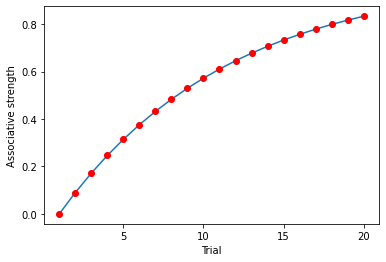

In [16]:
strength = np.zeros(20)
for t in range (1,20):
    newV = update_RW([strength[t-1]], [0.3], 0.3, 1)
    strength[t] = newV[0]
    
print(strength)

plt.plot(range(1,21),strength)
plt.plot(range(1,21),strength, 'ro')
plt.xticks([5,10,15,20])
plt.xlabel("Trial")
plt.ylabel("Associative strength")

### 2.2 Classical conditioning with two CSs

Now let's consider the more complicated case in which there are two CSs, A and B. Modify the code snippet below to generate predictions for what will happen when there are two stimuli presented at the same time. Assume that $\alpha_A = \alpha_B = 0.3$ and $\beta = 0.3$.

A:  [0.         0.09       0.1584     0.210384   0.24989184 0.2799178
 0.30273753 0.32008052 0.3332612  0.34327851 0.35089167 0.35667767
 0.36107503 0.36441702 0.36695694 0.36888727 0.37035433 0.37146929
 0.37231666 0.37296066]
B:  [0.         0.15       0.264      0.35064    0.4164864  0.46652966
 0.50456254 0.53346753 0.55543533 0.57213085 0.58481944 0.59446278
 0.60179171 0.6073617  0.61159489 0.61481212 0.61725721 0.61911548
 0.62052776 0.6216011 ]


Text(0.5, 1.0, 'B')

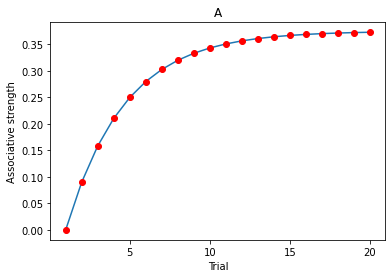

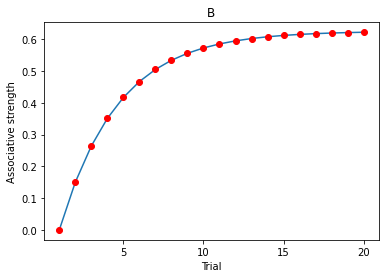

In [17]:
strengthA = np.zeros(20)
strengthB = np.zeros(20)
alphas = [0.3, 0.5]

for t in range(1,20):
  newVs = update_RW([strengthA[t-1], strengthB[t-1]], alphas, 0.3, 1)
  strengthA[t] = newVs[0]
  strengthB[t] = newVs[1]

  
    
print("A: ", strengthA)
print("B: ", strengthB)

plt.figure(1)
plt.plot(range(1,21),strengthA)
plt.plot(range(1,21),strengthA, 'ro')
plt.xticks([5,10,15,20])
plt.xlabel("Trial")
plt.ylabel("Associative strength")
plt.title("A")

plt.figure(2)
plt.plot(range(1,21),strengthB)
plt.plot(range(1,21),strengthB, 'ro')
plt.xticks([5,10,15,20])
plt.xlabel("Trial")
plt.ylabel("Associative strength")
plt.title("B")

1. How do the predictions in this case, with two CSs, differ from the predictions for a single CS? Why does this make sense? (Write your answers directly in this cell below by double-clicking on this text.)

**Predictions with 2 CSs differ from single CSs in the fact that the associative strength for each CS approaches 0.5 instead of the single CS approaching 1. This makes sense, because each CS is now "sharing" their strength, and since both CSs have the same alpha values, the difficulty of learning the stimuli are the same.**

2. Change $\alpha_B$ to 0.5. How do the predictions change? Why does this make sense? Write your answer below.

**The prediction changes by B having an associative strength approaching 0.625 and A having an associative strength approaching 0.375. This makes a lot of sense because 0.3/0.8 = 0.375 and .5/.8 = 0.625. So the associative strength for B is the same as $\alpha_B$/($\alpha_B$+$\alpha_A$) and the associative strength for A is $\alpha_A$/($\alpha_B$+$\alpha_A$). This makes logical sense because if one CS is easier to learn than another, then the strength of the easier to learn CS should be higher than the associative strength of a CS that is harder to learn**

### 2.3 Blocking

Now suppose that there are two CSs but they are presented in stages. First a learner gets a series of A+ trials (food with the flashing light) and later the learner gets a series of AB+ trials (food with the flashing light *and* the bell). How strongly will the learner end up associating B with the outcome in this case? In other words, would the dogs learn to salivate in response to the bells in this situation? Let's see what the model predicts.

The way we will do this is we will set $\alpha_B=0$ for trials 1 to 15, essentially making that stimulus nonexistent (unlearnable). After that point, we will set $\alpha_B=0.3$. In the plots, red is for A and blue is for B.

Text(0, 0.5, 'Associative strength')

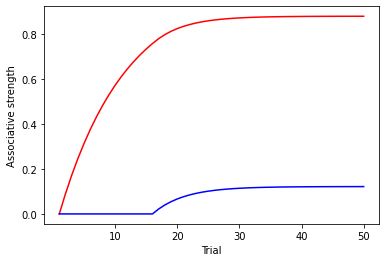

In [18]:
from matplotlib.ticker import NullFormatter
ntrials = 50

strengthA = np.zeros(ntrials)
strengthB = np.zeros(ntrials)

for t in range(1,ntrials):
    strengths = [strengthA[t-1]]
    alphas = [0.3]

    if (t > 15):
      strengths.append(strengthB[t-1])
      alphas.append(0.3)

    newVs = update_RW(strengths, alphas, 0.3, 1)
    
    strengthA[t] = newVs[0]

    if (t <= 15):
      strengthB[t] = 0
    else:
      strengthB[t] = newVs[1]


plt.figure(1)
plt.plot(range(1,ntrials+1),strengthA, 'r-')
plt.plot(range(1,ntrials+1),strengthB, 'b-')
plt.xticks([10,20,30,40,50])
plt.xlabel("Trial")
plt.ylabel("Associative strength")

1. After 50 trials, how do the associative strengths differ?

**After 50 trials, the strength of A (the flashing light in this example) is around 9 times stronger than the strength of B (ringing the bell)**

2. Intuitively, why does this prediction make sense?

**This prediction makes intuitive sense because the dog would have already associated the food with the flashing light, which would make it much harder to create the correlation between the food and the bell**

## 3 Limitations of the model

Now you'll explore some cases where the model makes predictions that don't match behavior.

### 3.1 Backward blocking

Suppose we reverse the order of the blocking trials. That is, suppose we begin with the AB+ trials and then remove the B stimulus for the later trials for a series of A+ trials. To make things concrete, this would be like flashing a light and ringing a bell while feeding the dogs and then later just flashing the light while feeding them. The question is how strong of an association are they going to form by the end between the bell and the food. This training scheme is called backward blocking for reasons explained later.

Before running the simulation, what do you intuitively think would happen in cases like this (both with animals and people)? There is no right or wrong answer, but justify your answer.

**Intuitively, I think that the strength of ringing the bell should slowly decrease, while the strength of the light should start to increase faster than before. This is because the association with one CS will be 'replaced' with the one that is keep being learned. However, I don't think that this is what the model will show though, since alpha will be 0 instead of negative. So maybe, a negative alpha is how easy it is for a stimulus to be forgotten**

Now modify the blocking code from earlier so that the order of the trials are swapped and see what the model predicts. In the plots, red is for A and blue is for B.

A:  [0.         0.09       0.1638     0.224316   0.27393912 0.31463008
 0.34799666 0.37535726 0.39779296 0.41619022 0.43127598 0.44364631
 0.45378997 0.46210778 0.46892838 0.47452127 0.47910744 0.48328086
 0.48707867 0.49053467 0.49367964 0.49654156 0.4991459  0.50151586
 0.50367251 0.50563507 0.507421   0.5090462  0.51052513 0.51187095
 0.51309565 0.51421013 0.5152243  0.5161472  0.51698704 0.51775129
 0.51844676 0.51907964 0.51965556 0.52017964 0.52065656 0.52109056
 0.52148549 0.52184488 0.52217193 0.52246954 0.52274037 0.52298682
 0.52321109 0.52341518]
B:  [0.         0.09       0.1638     0.224316   0.27393912 0.31463008
 0.34799666 0.37535726 0.39779296 0.41619022 0.43127598 0.44364631
 0.45378997 0.46210778 0.46892838 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452

Text(0, 0.5, 'Associative strength')

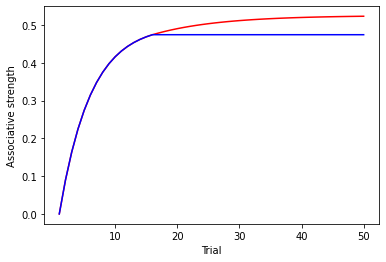

In [19]:
from matplotlib.ticker import NullFormatter
ntrials = 50

strengthA = np.zeros(ntrials)
strengthB = np.zeros(ntrials)

for t in range(1,ntrials):
    strengths = [strengthA[t-1], strengthB[t-1]]
    alphas = [0.3, 0.3]

    if (t > 15):
      alphas = [alphas[0], 0]

    newVs = update_RW(strengths, alphas, 0.3, 1)
    
    strengthA[t] = newVs[0]
    strengthB[t] = newVs[1]

print("A: ", strengthA)
print("B: ", strengthB)

plt.figure(1)
plt.plot(range(1,ntrials+1),strengthA, 'r-')
plt.plot(range(1,ntrials+1),strengthB, 'b-')
plt.xticks([10,20,30,40,50])
plt.xlabel("Trial")
plt.ylabel("Associative strength")

1. How do the predictions in this backward blocking situation differ from the predictions in the regular blocking situation?

**In this backwards blocking situation, the strengths increase at the exact same rate for the first 15 trials. But the since the rates increase so fast, the associative strengths are much closer than before, and the final total strengths for A is lower in this blocking situation than in the other blocking situation**

2. Examine the model and explain why it makes this prediction.

**The model makes this prediction because alpha is 0, and since alpha is being multiplied, the _change_ in associative strength will be 0, so the next v value will just be the previous**

This is one case where the model fails to account for real-world learning behavior. This situation is called backward blocking because even though a learner might develop an association between stimulus B and the outcome after the first phase of learning, the second phase of learning greatly reduces the association the learner has formed between B and the outcome -- as if stimulus A has gone backward and blocked the association for B.

### 3.2 Recovery from overshadowing

Let's look at one other case where the model fails. Consider the following two-stage training situation. First, the learner sees a series of AB+ trials (stimuli A and B paired together with the outcome). Then the learner sees a series of A- trials. This is a situation in which stimulus A is present but the outcome (the UCS) is not. To be concrete, this would be like flashing a light but not giving the dogs any food. The question is how strong of an association are they going to form by the end between the bell and the food?

Before running the simulation, what do you intuitively think would happen in cases like this (both with animals and people)? There is no right or wrong answer, but justify your answer.

**I think that in this situation, we would still associate the bell with food, but the strenght of the flashing light will start to decrease in strength. This is because the light is no longer being used as a trigger for the food, and we will no longer associate the light with recieving food**

Now modify the backward blocking code so that the outcome does not appear in the second part of the training and see what happens. Recall that the $\lambda$ parameter represents the value of the outcome. In the plots, red is for A and blue is for B.

A:  [ 0.          0.09        0.1638      0.224316    0.27393912  0.31463008
  0.34799666  0.37535726  0.39779296  0.41619022  0.43127598  0.44364631
  0.45378997  0.46210778  0.46892838  0.47452127  0.38910744  0.31138086
  0.24064967  0.17628428  0.11771178  0.06441081  0.01590692 -0.02823162
 -0.06839769 -0.10494881 -0.13821033 -0.16847831 -0.19602218 -0.2210871
 -0.24389617 -0.26465243 -0.28354063 -0.30072889 -0.3163702  -0.3306038
 -0.34355637 -0.35534321 -0.36606923 -0.37582992 -0.38471214 -0.39279496
 -0.40015033 -0.40684371 -0.41293469 -0.41847749 -0.42352143 -0.42811141
 -0.4322883  -0.43608927]
B:  [0.         0.09       0.1638     0.224316   0.27393912 0.31463008
 0.34799666 0.37535726 0.39779296 0.41619022 0.43127598 0.44364631
 0.45378997 0.46210778 0.46892838 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127 0.47452127
 0.47452127 0.47452127 0.47452127 0.47452127 0.47

Text(0, 0.5, 'Associative strength')

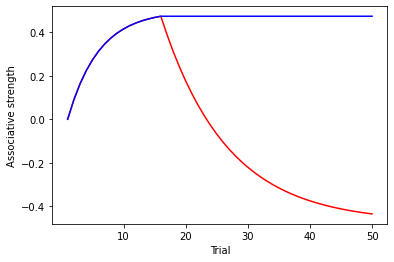

In [20]:
from matplotlib.ticker import NullFormatter
ntrials = 50

strengthA = np.zeros(ntrials)
strengthB = np.zeros(ntrials)

for t in range(1,ntrials):
    strengths = [strengthA[t-1], strengthB[t-1]]
    alphas = [0.3, 0.3]
    lam = 1

    if (t > 15):
      alphas = [alphas[0], 0]
      lam = 0

    newVs = update_RW(strengths, alphas, 0.3, lam)
    
    strengthA[t] = newVs[0]
    strengthB[t] = newVs[1]

print("A: ", strengthA)
print("B: ", strengthB)

plt.figure(1)
plt.plot(range(1,ntrials+1),strengthA, 'r-')
plt.plot(range(1,ntrials+1),strengthB, 'b-')
plt.xticks([10,20,30,40,50])
plt.xlabel("Trial")
plt.ylabel("Associative strength")

1. What happens in this situation?

**The associative strength of B stays constant after the A- trials, while the strength of A decreases, and even has a negative associative strength**

2. Examine the model and explain why it makes the predictions it does about the associative strengths for A and B.

**For A, the model makes this prediction because λ becomes 0 during the A- trials, so the combined strength of the 2 stimuli becomes greater than λ. So, the change in A's strength will become negative, resulting in the strength of A decreasing**

**For B, the α value becomes 0 during the A- trials. This then makes the change in B's strength 0, which is why B stays constant during the A- trials**

3. Contrary to the model's predictions, subjects in studies tend to increase the strength of their association between B and the outcome after the second stage of learning. Why do you think that is?

**That might be because humans remember their association with B, and the association with A doesn't 'take up' as much strength**